## Mehmet Kayğusuz     -      16/05/2021

Oluşturulan yazılım gripper tarafından tutulan kondansatör bacakları arasındaki mesafeyi otomatik olarak pixel cinsinden bulmayı amaçlar.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

Program çalışma süresi için değişken oluşturulur.

In [2]:
basla = time.time()

In [3]:
image = cv2.imread("IP1_Cap.jpg",1)
print(image.shape)

(1145, 1600, 3)


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1599.5, 1144.5, -0.5))

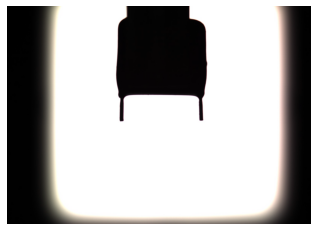

In [4]:
plt.figure(), plt.imshow(image), plt.axis("off")

Mesafe algoritmasında işlenecek olan görüntü için sadece kondansatör uçlarını içeren resim bölgesi alınmalıdır. Bunun için resim ile aynı boyutta boş frame oluşturuldu.

In [ ]:
height, width= image.shape[:2]
image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask= np.ones((height,width,1),np.uint8)
plt.figure(), plt.imshow(mask, cmap="gray"), plt.axis("off")

Belirtilen ilgi bölgesi oluşturuldu ve kondansatör bacakları ile boş resim birleştirildi.

In [ ]:
ROI= np.array([[(0,680),(0,480),(1600,480),(1600,680)]], dtype= np.int32)
region_of_interest= cv2.fillPoly(mask, ROI, 255)
region_of_interest_image= cv2.bitwise_and(image_gray, region_of_interest)
plt.figure(), plt.imshow(region_of_interest_image, cmap="gray"), plt.axis("off")

In [ ]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(region_of_interest_image, cv2.MORPH_OPEN, kernel)
plt.figure(), plt.imshow(opening, cmap="gray"), plt.axis("off")

Dilate ve erode fonksiyonları ile sadece kondansatör bacakları görüntü işleme adımı için ele alındı

In [ ]:
edged = cv2.Canny(opening, 50, 100)
edged = cv2.dilate(edged, None, iterations=26)
edged = cv2.erode(edged, None, iterations=27)
plt.imshow(edged)

Kondansatör bacakları kutu içine yerleştirildi. Ayrıca bu adımda kondansatör ucları içerisinde pixel değerleri bir listeye atandı ve işaretleme ve uzunluk ölçümü için kondansatör ucunda çizilen dikdörtgenin, kenar ortalaması pixel değeri olarak alındı.

In [ ]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
liste1 = []
liste2 = []
liste3 = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    print(x,y,w,h)
    #cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,255,0),5)  
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3)
    print(w*h)
    print("Yükseklik: ",h)
    print("Genişlik: ",w)
    print("Nokta pixeli: ",(x+int(w/2)),(y+h-20))
    liste2.append(x+int(w/2))
    liste3.append(y+h-20)
    plt.title("Bounding Rectangle")
    plt.imshow(image_copy)
    plt.axis("off")
    for i in range(x, x+w-1, 1):
        for j in range(y, y+h-1, 1):
            if edged[i][j] == [0]:
                liste1.append((i,j))

Oluşturulan pixel değerine daire ve iki daire arasına ok çizildi.

In [ ]:
a=cv2.circle(edged,(liste2[1], liste3[1]), 1, (0,255,0), 10)
b=cv2.circle(edged,(liste2[0], liste3[0]), 1, (0,255,0), 10)
c = cv2.arrowedLine(image_copy, (liste2[0], liste3[0]), (liste2[1], liste3[1]), (255,0,0), 5)
d = cv2.arrowedLine(image_copy, (liste2[1], liste3[1]), (liste2[0], liste3[0]), (255,0,0), 5)

In [ ]:
plt.figure(), plt.imshow(d, cmap="gray"), plt.axis("off")

Mesafe hesabı math kütüphanesi ile gerçekleştirildi

In [ ]:
import math
m = (((liste2[0] - liste2[1]) ** 2) + ((liste3[0] - liste3[1]) ** 2))
mesafe = int(math.sqrt(m))
print(mesafe, "pixel")

Pixel mesafe değeri ekrana yazdırıldı.

In [ ]:
plt.text(liste3[0]+30, liste3[1]+90, 'mesafe: '+str(mesafe)+' pixel', fontsize=11, color = 'red')
plt.imshow(d, cmap="gray"), plt.axis("off")
plt.show()

Program çalışma süresi

In [ ]:
son = time.time()-basla
print("Çalışma zamanı: {}".format(son))